In [ ]:
import zipfile
import os

# Unzip the uploaded file to check its contents
zip_path = '/content/archive (2).zip'
extract_path = '/content/archive (2)/Groceries_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to understand the dataset's structure
extracted_files = os.listdir(extract_path)
extracted_files


['Groceries_dataset.csv']

In [ ]:
import pandas as pd

orders = pd.read_csv(os.path.join(extract_path, 'Groceries_dataset.csv'))
# # Load key files to inspect their contents
# orders_df = pd.read_csv(os.path.join(extract_path, 'orders.csv'))
# order_details_df = pd.read_csv(os.path.join(extract_path, 'order_details.csv'))
# meals_df = pd.read_csv(os.path.join(extract_path, 'meals.csv'))
# restaurants_df = pd.read_csv(os.path.join(extract_path, 'restaurants.csv'))

# # Display the first few rows of each dataframe to understand their structure
# orders_df.head(), order_details_df.head(), meals_df.head(), restaurants_df.head()
orders


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


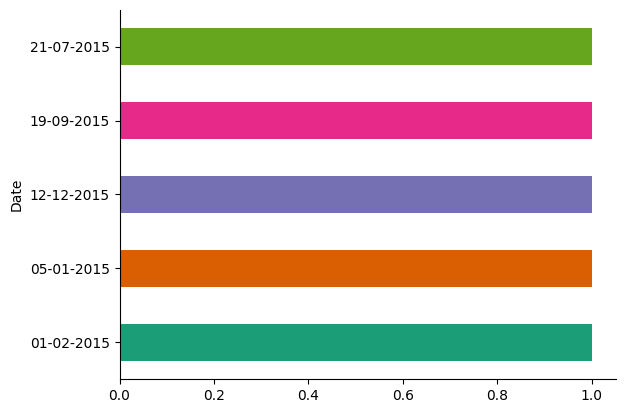

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

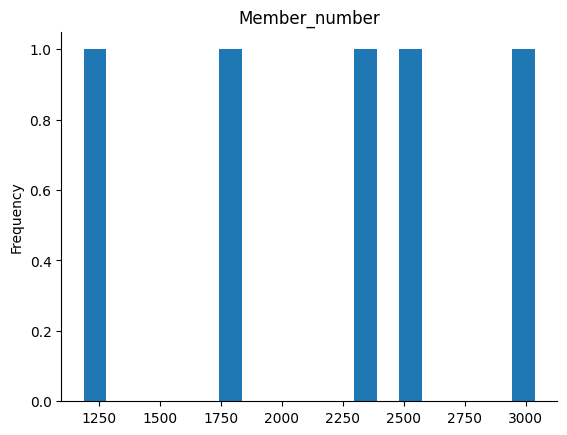

In [ ]:
from matplotlib import pyplot as plt
_df_0['Member_number'].plot(kind='hist', bins=20, title='Member_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Merge orders with order details on 'id' and 'order_id' to get meal data with orders
merged_df = pd.merge(orders_df, order_details_df, left_on='id', right_on='order_id')

# Merge with meals to get meal-specific details for each order
merged_df = pd.merge(merged_df, meals_df, left_on='meal_id', right_on='id', suffixes=('_order', '_meal'))

# Convert date to datetime format for time-based analysis
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Display the first few rows of the merged dataframe
merged_df.head()


,id_x,date,hour,member_id,restaurant_id_order,total_order,id_y,order_id,meal_id,id,restaurant_id_meal,serve_type_id,meal_type_id,hot_cold,meal_name,price
0,3,2020-01-01,11:10:00.0000000,62,16,39.0,1,3,176,176,16,2,2,Cold,Meal 176,39.00
1,5,2020-01-01,11:13:00.0000000,152,30,153.0,2,5,349,349,30,2,1,Cold,Meal 349,54.51
2,5,2020-01-01,11:13:00.0000000,152,30,153.0,3,5,348,348,30,1,1,Cold,Meal 348,37.15
3,5,2020-01-01,11:13:00.0000000,152,30,153.0,4,5,344,344,30,2,1,Hot,Meal 344,24.19
4,5,2020-01-01,11:13:00.0000000,152,30,153.0,5,5,348,348,30,1,1,Cold,Meal 348,37.15


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70577 entries, 0 to 70576
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_x                 70577 non-null  int64         
 1   date                 70577 non-null  datetime64[ns]
 2   hour                 70577 non-null  object        
 3   member_id            70577 non-null  int64         
 4   restaurant_id_order  70577 non-null  int64         
 5   total_order          70577 non-null  float64       
 6   id_y                 70577 non-null  int64         
 7   order_id             70577 non-null  int64         
 8   meal_id              70577 non-null  int64         
 9   id                   70577 non-null  int64         
 10  restaurant_id_meal   70577 non-null  int64         
 11  serve_type_id        70577 non-null  int64         
 12  meal_type_id         70577 non-null  int64         
 13  hot_cold             70577 non-

In [ ]:
merged_df.describe()

,id_x,date,member_id,restaurant_id_order,total_order,id_y,order_id,meal_id,id,restaurant_id_meal,serve_type_id,meal_type_id,price
count,70577.000000,70577,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000,70577.000000
mean,18022.653386,2020-03-31 17:42:03.014579712,100.654335,15.487312,128.924388,35289.000000,18022.653386,174.097992,174.097992,15.487312,2.064497,2.141902,44.835973
min,3.000000,2020-01-01 00:00:00,1.000000,1.000000,20.140000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.140000
25%,8957.000000,2020-02-15 00:00:00,51.000000,8.000000,80.920000,17645.000000,8957.000000,80.000000,80.000000,8.000000,1.000000,1.000000,32.650000
50%,18070.000000,2020-03-31 00:00:00,101.000000,15.000000,123.360000,35289.000000,18070.000000,175.000000,175.000000,15.000000,2.000000,2.000000,40.000000
75%,27049.000000,2020-05-17 00:00:00,151.000000,23.000000,169.800000,52933.000000,27049.000000,268.000000,268.000000,23.000000,3.000000,3.000000,54.720000
max,36000.000000,2020-07-01 00:00:00,200.000000,30.000000,381.690000,70577.000000,36000.000000,350.000000,350.000000,30.000000,3.000000,4.000000,80.920000
std,10407.579887,NaN,57.768303,8.660693,61.369568,20373.969311,10407.579887,105.387164,105.387164,8.660693,0.811708,1.006510,15.938179


In [ ]:
merged_df.to_csv('daily_sales.csv', index=False)
from google.colab import files
files.download('daily_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = pd.read_csv('/content/daily_sales.csv')

# Convert 'date' column to datetime format to enable time-based aggregation
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'week' representing the week of each entry
data['week'] = data['date'].dt.isocalendar().week
data['year'] = data['date'].dt.year

# Aggregate weekly sales by summing up 'total_order' for each week
weekly_sales = data.groupby(['year', 'week', 'restaurant_id_order']).agg(
    weekly_total_orders=('total_order', 'sum'),
    weekly_revenue=('price', 'sum')
).reset_index()

# Display the first few rows of the aggregated weekly data
weekly_sales.head()


,year,week,restaurant_id_order,weekly_total_orders,weekly_revenue
0,2020,1,1,9210.00,2834.45
1,2020,1,2,6865.79,2235.28
2,2020,1,3,6235.59,1964.79
3,2020,1,4,2218.52,1000.91
4,2020,1,5,9287.93,3322.89


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Selecting features (using only year, week, and restaurant_id_order as initial features)
X = weekly_sales[['year', 'week', 'restaurant_id_order']]
y = weekly_sales['weekly_total_orders']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# # Reshaping for LSTM input (samples, time steps, features)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1,5), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: UInt32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features (using only year, week, and restaurant_id_order as initial features)
X = weekly_sales[['year', 'week', 'restaurant_id_order']]
y = weekly_sales['weekly_total_orders']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(14563222.73432415, 0.0007227878124158593)

In [ ]:
# Add a feature to indicate hot vs. cold meals
data['is_hot'] = data['hot_cold'].apply(lambda x: 1 if x == 'Hot' else 0)
weekly_features = data.groupby(['year', 'week', 'restaurant_id_order']).agg(
    weekly_total_orders=('total_order', 'sum'),
    weekly_revenue=('price', 'sum'),
    avg_order_price=('price', 'mean'),
    hot_meals=('is_hot', 'sum'),
    cold_meals=('is_hot', 'count')
).reset_index()

weekly_features['cold_meals'] = weekly_features['cold_meals'] - weekly_features['hot_meals']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = weekly_features[['year', 'week', 'restaurant_id_order', 'avg_order_price', 'hot_meals', 'cold_meals']]
y = weekly_features['weekly_total_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 978924.6149237596
R-squared Score: 0.9328296299529051


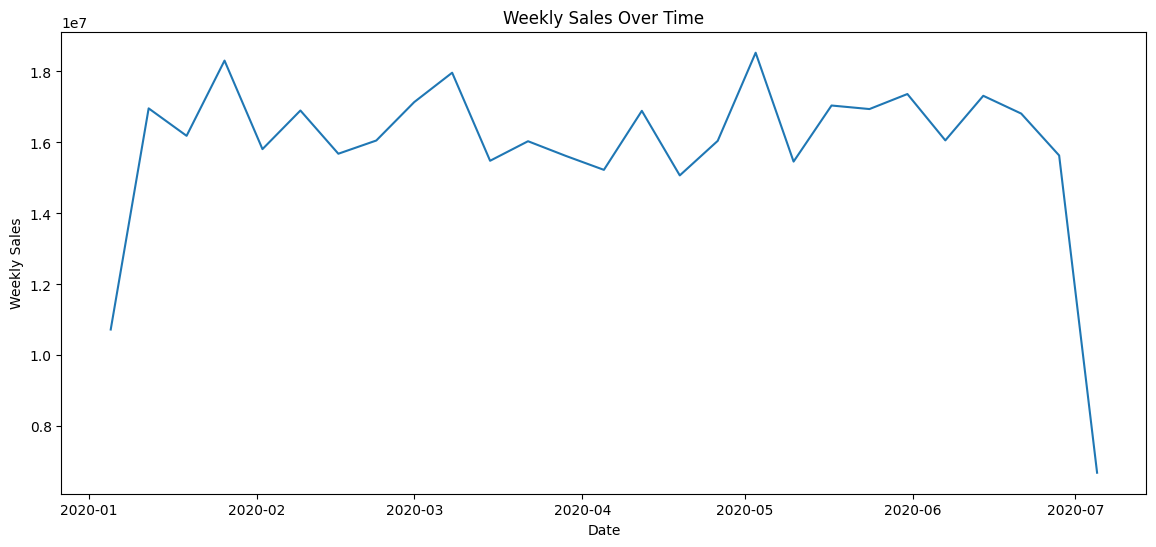

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 272027105624064.0000 - val_loss: 235883714314240.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 263111860813824.0000 - val_loss: 233780841283584.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 262934542417920.0000 - val_loss: 231628341248000.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 259699979059200.0000 - val_loss: 229415694893056.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 266628583391232.0000 - val_loss: 227144496054272.0000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 265353934405632.0000 - val_loss: 224802749022208.0000
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 264007579598848.0000 - val_loss: 222383961014272.0000
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 258818890006528.0000 - val_loss: 219896772296704.0000
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 241732201480192.0000 - val_loss: 217328650289152.0000
Epoch 10/50

(63909009496732.15, 7369095.361433335)

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Calculate daily sales as total_order * price
data['daily_sales'] = data['total_order'] * data['price']

# Aggregate daily sales by date
daily_sales = data.groupby('date')['daily_sales'].sum().reset_index()

# Resample to weekly sales
weekly_sales = daily_sales.set_index('date').resample('W').sum()

# Plot weekly sales to inspect trend and seasonality
plt.figure(figsize=(14, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales['daily_sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# Prepare data for modeling
weekly_sales['sales_next_week'] = weekly_sales['daily_sales'].shift(-1)
weekly_sales = weekly_sales.dropna()

# Splitting data into features and target
X = weekly_sales[['daily_sales']].values  # Feature: current week's sales
y = weekly_sales['sales_next_week'].values  # Target: next week's sales

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data for LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=4, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict and evaluate the model
y_pred = model.predict(X_test_lstm)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data to improve model performance
scaler = MinMaxScaler()
weekly_sales['scaled_sales'] = scaler.fit_transform(weekly_sales[['daily_sales']])

# Use the last 4 weeks as input features to predict the next week's sales
def create_sequences(data, n_steps=4):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Prepare the sequences
n_steps = 4  # Last 4 weeks
X, y = create_sequences(weekly_sales['scaled_sales'].values, n_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build a deeper LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=4, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test_lstm)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate errors
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

mse, mae


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - loss: 0.6186 - val_loss: 0.5448
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4263 - val_loss: 0.4727
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4051 - val_loss: 0.3964
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3709 - val_loss: 0.3064
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2704 - val_loss: 0.1929
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1465 - val_loss: 0.0661
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0554 - val_loss: 0.0085
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0249 - val_loss: 0.0621
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0518 - val_loss: 0.0244
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0251 - val_loss: 0.0071
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0196 - val_loss: 0.0189
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0355 - val_loss: 0.0169


(396446668607.2167, 568805.4110399995)

In [ ]:
# Re-import and preprocess the data
data = pd.read_csv("/content/daily_sales.csv")
data['date'] = pd.to_datetime(data['date'])
data['daily_sales'] = data['total_order'] * data['price']
daily_sales = data.groupby('date')['daily_sales'].sum().reset_index()
weekly_sales = daily_sales.set_index('date').resample('W').sum()

# Normalize weekly sales
scaler = MinMaxScaler()
weekly_sales['scaled_sales'] = scaler.fit_transform(weekly_sales[['daily_sales']])

# Create sequences of the last 4 weeks to predict the next week's sales
def create_sequences(data, n_steps=4):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 4
X, y = create_sequences(weekly_sales['scaled_sales'].values, n_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define an improved LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=4, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict and rescale the predictions for evaluation
y_pred = model.predict(X_test_lstm)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

mse, mae


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.6514 - val_loss: 0.4747
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6081 - val_loss: 0.4219
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5034 - val_loss: 0.3548
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3979 - val_loss: 0.2659
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3004 - val_loss: 0.1623
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1297 - val_loss: 0.1094
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0290 - val_loss: 0.2651
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0561 - val_loss: 0.2029
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - val_loss: 0.1312
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0131 - val_loss: 0.1145
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0139 - val_loss: 0.1170
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - val_loss: 0.1374


(19769259253900.312, 2382779.7114)